# Data Transforms

## How to Scale Numerical Data

## Data Normalization

## y = x - min / max - min

## Data Standardization

#### Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data. Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales. Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. 

### Subtracting the mean from the data is called centering, whereas dividing by the standard deviation is called scaling. As such, the method is sometimes called center scaling.

## Not Scaled

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

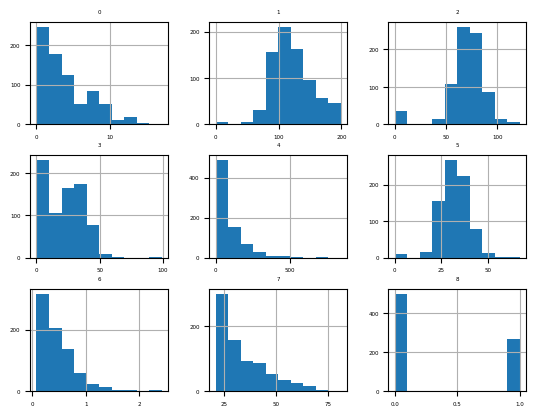

In [1]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
dataset = read_csv('data/diabetes.csv', header=None) # summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

## testing model with no scaled inputs

In [2]:

# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = read_csv('data/diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


## Scaling Model

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

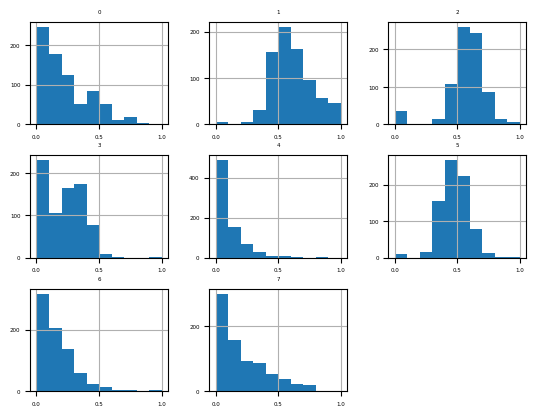

In [3]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('data/diabetes.csv', header=None) # retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

## Scaling Model + Testing

In [5]:

# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('data/diabetes.csv', header=None) 
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


##  Should I Normalize or Standardize?

### Whether input variables require scaling depends on the specifics of your problem and of each variable. You may have a sequence of quantities as inputs, such as prices or temperatures. If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

## How to Scale Data With Outliers

#### One approach to data scaling involves calculating the mean and standard deviation of each variable and using these values to scale the values to have a mean of zero and a standard deviation of one, a so-called standard normal probability distribution. This process is called standardization and is most useful when input variables have a Gaussian probability distribution. Standardization is calculated by subtracting the mean value and dividing by the standard deviation.

### Standardization

### Value = value - mean / standard_deviation

## Robust Scaler Transforms

### value = value - mdeian / (p75 - p25)

### Dataset without scaling

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

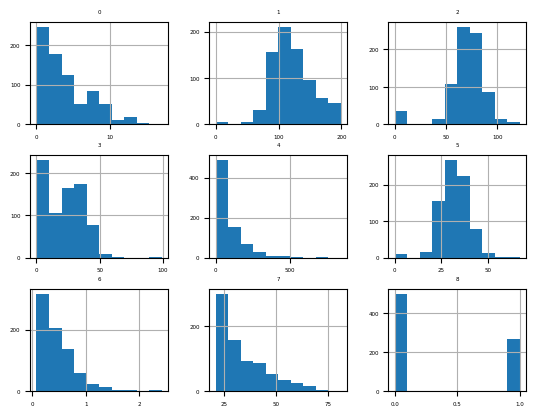

In [6]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('data/diabetes.csv', header=None) # summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Model without scaling

In [8]:

# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('data/diabetes.csv', header=None) 
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


## IQR Robust Scaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

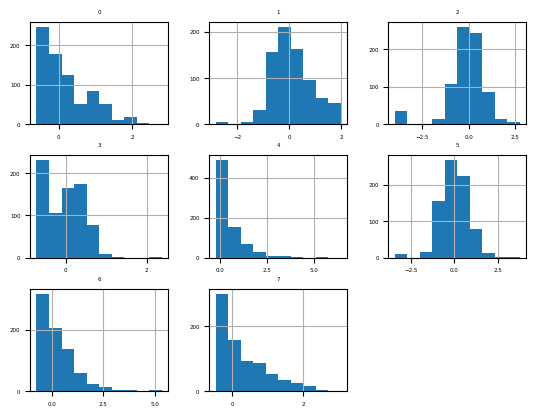

In [10]:
# visualize a robust scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot
# load dataset
dataset = read_csv('data/diabetes.csv', header=None) # retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

## Model with Robust Scaling

In [11]:

# evaluate knn on the diabetes dataset with robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('data/diabetes.csv', header=None) 
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


### Specifying IQR Range

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


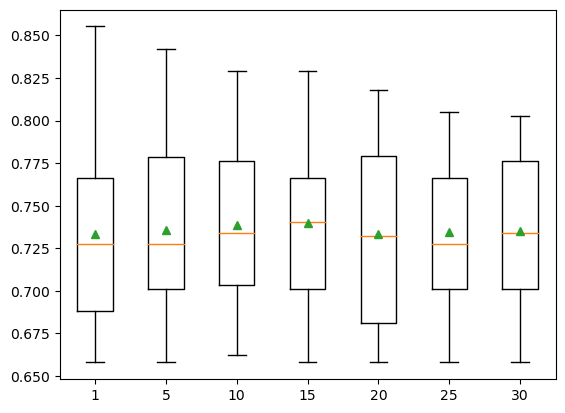

In [12]:

# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  # load dataset
  dataset = read_csv('data/diabetes.csv', header=None) 
  data = dataset.values
# separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str')) 
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for value in [1, 5, 10, 15, 20, 25, 30]:
    # define the pipeline
    trans = RobustScaler(quantile_range=(value, 100-value))
    model = KNeighborsClassifier()
    models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## How to Encode Categorical Data

### Nominal Variable. Variable comprises a finite set of discrete values with no rank-order relationship between values.


### Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

## How to Make Distributions More Gaussian

In [ ]:
PowerTransformer(method='yeo-johnson', standardize=True)
PowerTransformer(method='box-cox')

## How to Change Numerical Data Distributions

### Quantile Transforms

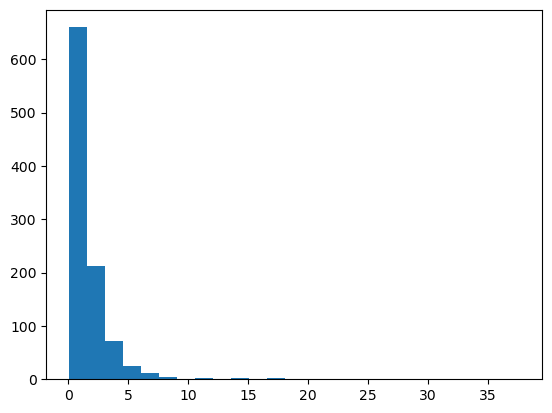

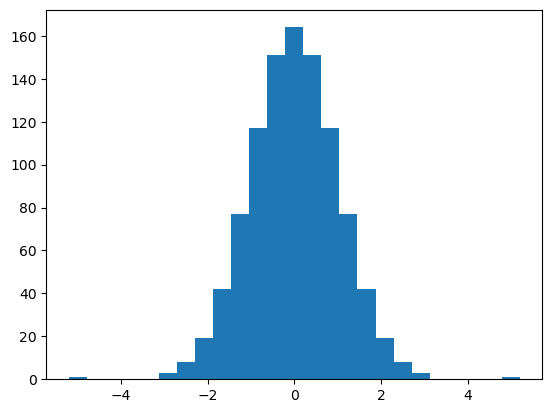

In [1]:

# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal') 
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

## Uniform Quantile Transform

In [2]:

# evaluate knn on the sonar dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('data/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


## How to Transform Numerical to Categorical Data


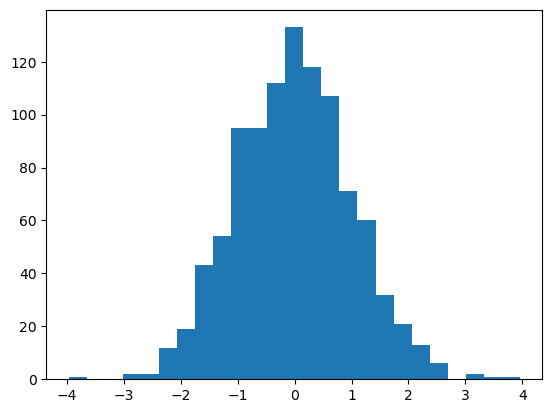

[[ 1.75022162]
 [ 1.36525737]
 [ 0.09675253]
 [-1.22594275]
 [ 0.20081806]
 [ 0.20594121]
 [-0.09171192]
 [ 1.09784478]
 [-0.2887499 ]
 [ 0.68001258]]


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


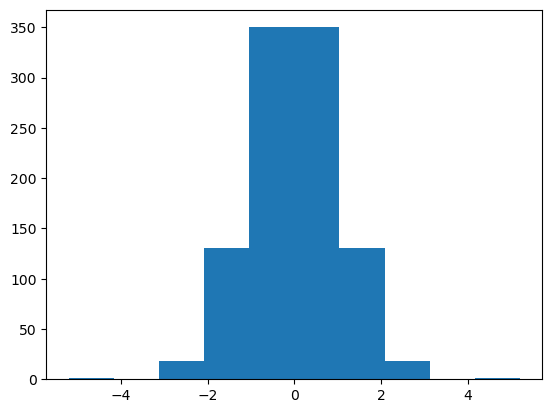

In [3]:
# demonstration of the discretization transform
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
ata_trans = kbins.fit_transform(data)
# summarize first few rows
print(data_trans[:10, :])
# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()


### Before Discretization

In [5]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('data/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


### After Discretization

In [8]:

# evaluate knn on the sonar dataset with uniform ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('data/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.079)


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling 

### k-Means Discretization Transform

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


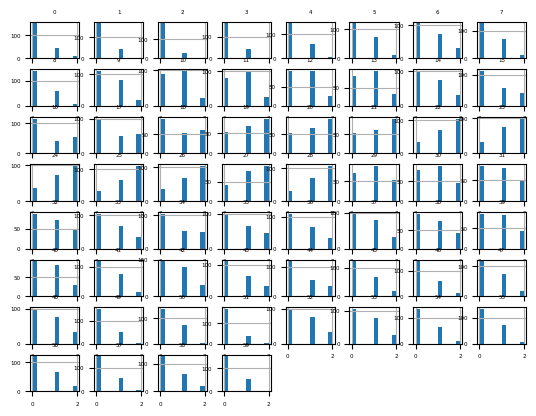

In [9]:
# visualize a k-means ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot
# load dataset
dataset = read_csv('data/sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Evaluate knn on the sonar dataset with k-means ordinal discretization transform

In [10]:
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('data/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling 

Accuracy: 0.821 (0.089)


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling 

## Explore number of discrete bins on classification accuracy

>2 0.822 (0.077)
>3 0.878 (0.053)
>4 0.836 (0.083)
>5 0.840 (0.069)
>6 0.843 (0.069)
>7 0.854 (0.071)
>8 0.837 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


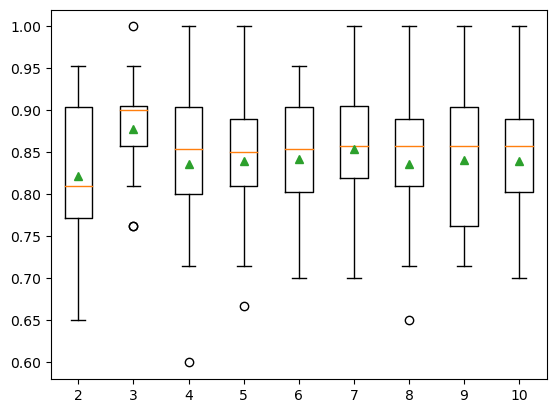

In [12]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  # load dataset
  dataset = read_csv('data/sonar.csv', header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(2,11):
    # define the pipeline
    trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile') 
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
  return scores
# get the dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## How to Derive New Input Variables

### Polynomial Features

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


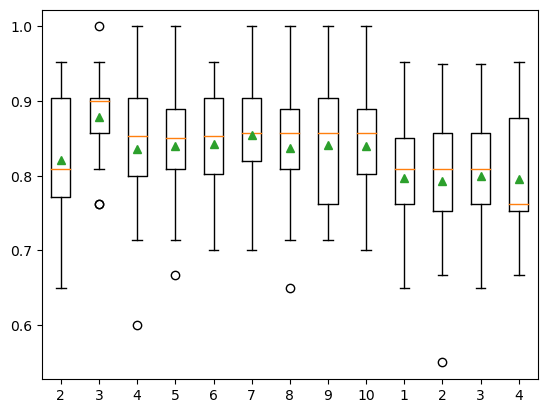

In [13]:

# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
  # load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for d in range(1,5):
    # define the pipeline
    trans = PolynomialFeatures(degree=d)
    model = KNeighborsClassifier()
    models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
  return scores
# define dataset
X, y = get_dataset('data/sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) # plot model performance for comparison 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show()